In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json
from networkx import json_graph
import os

seed = 100

In [2]:
# function to read graph in json format
def read_json_file(filename: str) -> nx.Graph:
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [3]:
centrality_names = {
    'betweenness_centr_uw' : 'Betweenness Centrality - Unweighted',
    #'betweenness_centr' : 'Betweenness Centrality - Weighted',
    'pagerank_centr_uw' : 'PageRank Centrality - Unweighted',
    'degree_centr' : 'Degree Centrality - Unweighted',
    'pagerank_centr' : 'PageRank Centrality - Weighted',
    'eigenv_centr' : 'Eigenvector Centrality - Weighted',
    'eigenv_centr_uw' : 'Eigenvector Centrality - Unweighted',
    'closeness_centr' : 'Closeness Centrality - Unweighted' 
}

In [4]:
# technology graph
graph_path = '/Users/koshelev/Documents/lmu/thesis/1-graph_construction/data/preprocessed/technology_graphs_1/'
centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology1/'
graph = read_json_file(graph_path + 'technology_graph_1963.json')
centr = pd.DataFrame()
colnames = []  # to test that nodes are ordered correctly
for filename in os.listdir(centr_path):
    centr_ver = pd.read_csv(centr_path + filename, index_col=0).loc[1963]
    colnames.append(list(centr_ver.index))
    centr[filename[:-4]] = centr_ver.values
del centr_ver
# check if all nodes are ordered in the same way in all centrality dataframes
print(np.all(np.array(colnames) == colnames[0]))
if np.all(np.array(colnames) == colnames[0]):
    centr.index = colnames[0]
centr.dropna(inplace=True)
# check if we know centralities for all nodes of the graph
print(np.all(np.isin(centr.index, list(graph.nodes))))

True
True


In [5]:
centr = centr.loc[list(graph.nodes)]

In [7]:
centr.drop(columns=['betweenness_centr'], inplace=True)

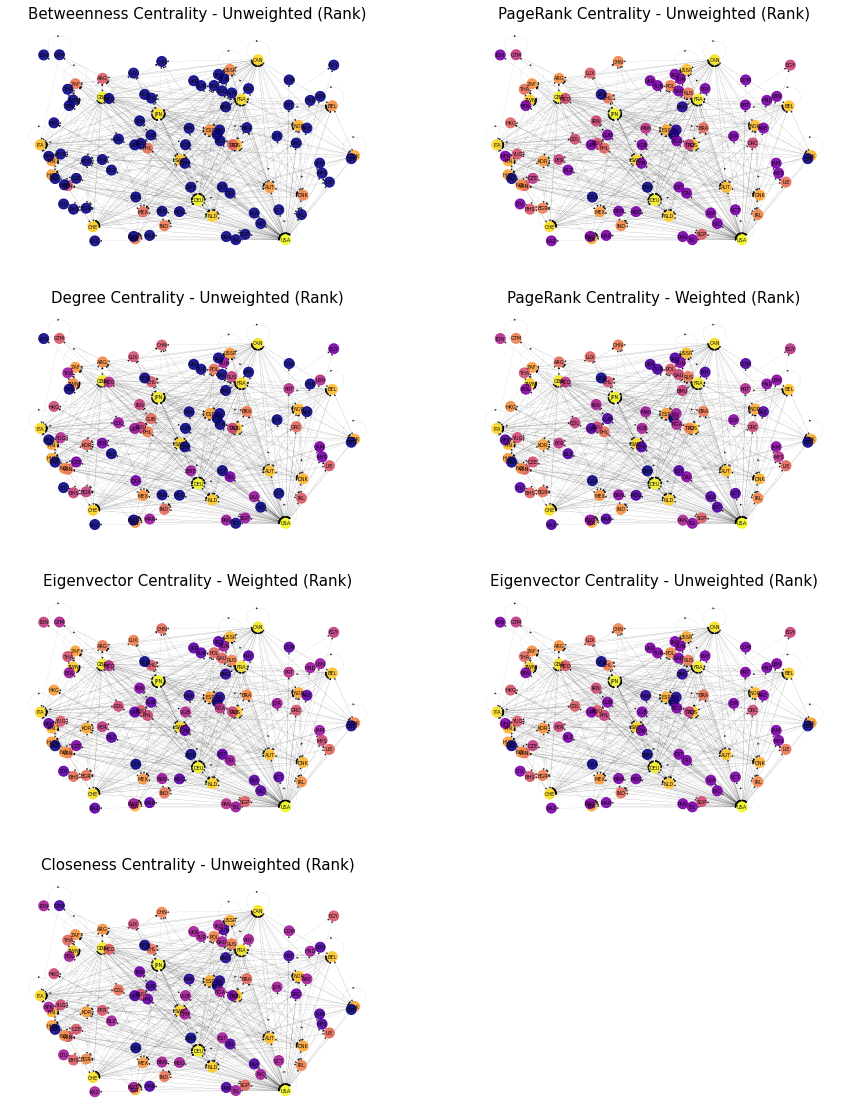

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15,20))
for i in range(len(centr.columns)):
    col = centr.columns[i]
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    val_map = {}
    for c in centr.index:
        val_map[c] = centr.rank().loc[c][col]
        
    colmax = centr[col].max()

    values = [val_map.get(node)/colmax for node in graph.nodes()]

    nx.draw_networkx(G=graph, 
                     pos=nx.random_layout(G=graph, seed=10), 
                     node_size=100, 
                     with_labels=True, 
                     alpha=0.9, 
                     arrowsize=5,
                     width=0.05,
                     cmap=plt.get_cmap('plasma'),
                     node_color=values, 
                     ax=ax[ix], 
                     font_size=5)
    ax[ix].set_title(centrality_names[col] + ' (Rank)', fontsize=15)
    ax[ix].set_axis_off()
ax[(3, 1)].set_axis_off()
plt.savefig('centrality_comparison_rank.pdf', bbox_inches='tight')
plt.savefig('centrality_comparison_rank.png', bbox_inches='tight')

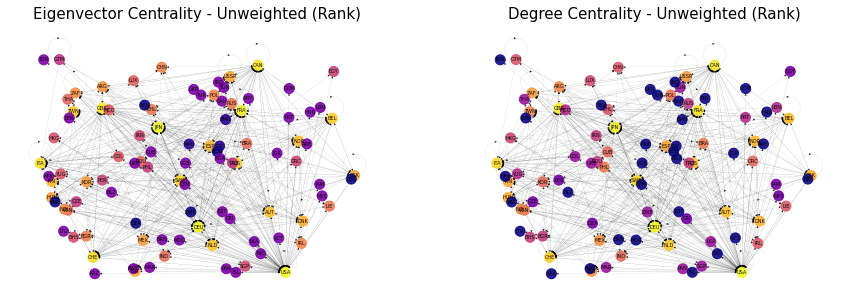

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
two_centralities = ["eigenv_centr_uw", "degree_centr"]
for i in range(len(two_centralities)):
    col = two_centralities[i]
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    val_map = {}
    for c in centr.index:
        val_map[c] = centr.rank().loc[c][col]
        
    colmax = centr[col].max()

    values = [val_map.get(node)/colmax for node in graph.nodes()]

    nx.draw_networkx(G=graph, 
                     pos=nx.random_layout(G=graph, seed=10), 
                     node_size=100, 
                     with_labels=True, 
                     alpha=0.9, 
                     arrowsize=5,
                     width=0.05,
                     cmap=plt.get_cmap('plasma'),
                     node_color=values, 
                     ax=ax[ix], 
                     font_size=5)
    ax[ix].set_title(centrality_names[col] + ' (Rank)', fontsize=15)
    ax[ix].set_axis_off()
plt.savefig('centrality_comparison_rank2.pdf', bbox_inches='tight')
plt.savefig('centrality_comparison_rank2.png', bbox_inches='tight')

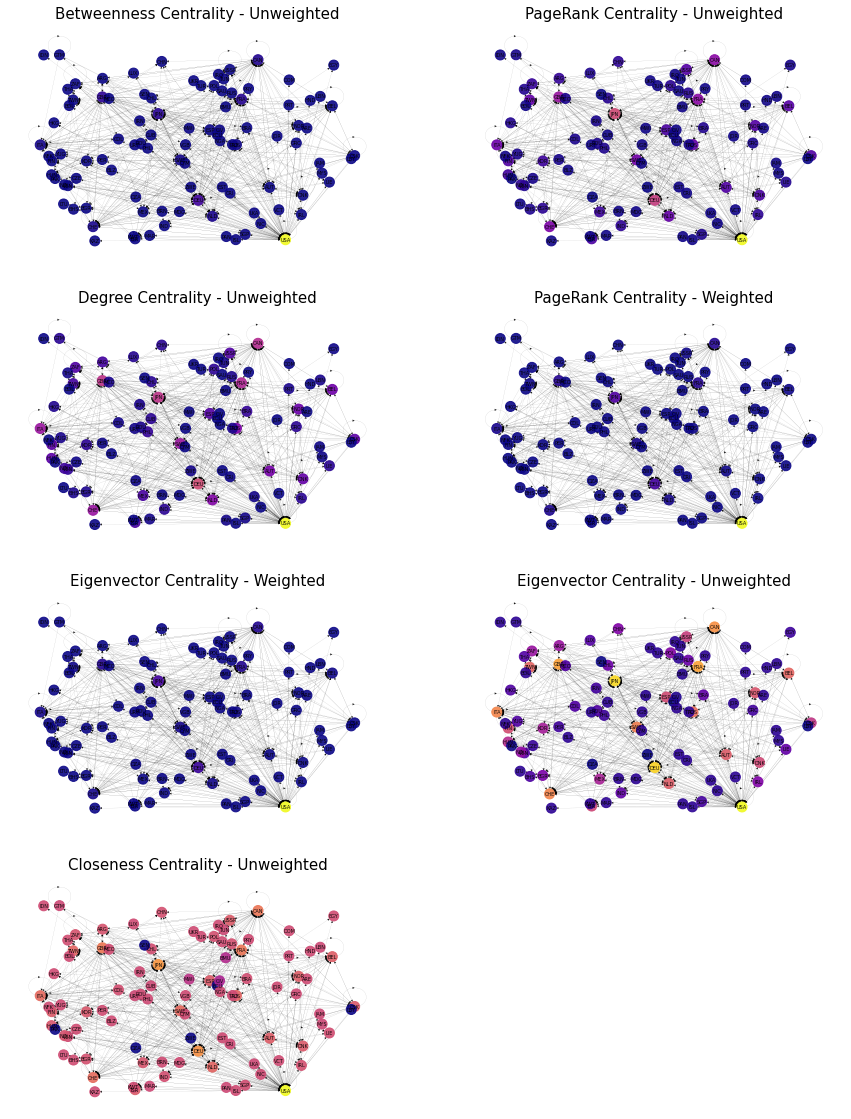

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(15,20))
for i in range(len(centr.columns)):
    col = centr.columns[i]
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    val_map = {}
    for c in centr.index:
        val_map[c] = centr.loc[c][col]
        
    colmax = centr[col].max()

    values = [val_map.get(node)/colmax for node in graph.nodes()]

    nx.draw_networkx(G=graph, 
                     pos=nx.random_layout(G=graph, seed=10), 
                     node_size=100, 
                     with_labels=True, 
                     alpha=0.9, 
                     arrowsize=5,
                     width=0.05,
                     cmap=plt.get_cmap('plasma'),
                     node_color=values, 
                     ax=ax[ix], 
                     font_size=5)
    ax[ix].set_title(centrality_names[col], fontsize=15)
    ax[ix].set_axis_off()
ax[(3, 1)].set_axis_off()
plt.savefig('centrality_comparison.pdf', bbox_inches='tight')
plt.savefig('centrality_comparison.png', bbox_inches='tight')

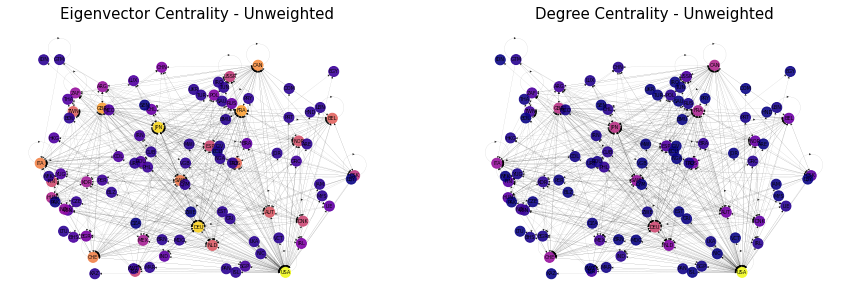

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
two_centralities = ["eigenv_centr_uw", "degree_centr"]
for i in range(len(two_centralities)):
    col = two_centralities[i]
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    val_map = {}
    for c in centr.index:
        val_map[c] = centr.loc[c][col]
        
    colmax = centr[col].max()

    values = [val_map.get(node)/colmax for node in graph.nodes()]

    nx.draw_networkx(G=graph, 
                     pos=nx.random_layout(G=graph, seed=10), 
                     node_size=100, 
                     with_labels=True, 
                     alpha=0.9, 
                     arrowsize=5,
                     width=0.05,
                     cmap=plt.get_cmap('plasma'),
                     node_color=values, 
                     ax=ax[ix], 
                     font_size=5)
    ax[ix].set_title(centrality_names[col], fontsize=15)
    ax[ix].set_axis_off()
plt.savefig('centrality_comparison2.pdf', bbox_inches='tight')
plt.savefig('centrality_comparison2.png', bbox_inches='tight')